# CLUSTERING DATA ANALYSIS 

Clustering

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
#Importing my data

nigerian_music_df = pd.read_csv('nigerian_spotify_songs1.csv')

In [3]:
nigerian_music_df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [4]:
nigerian_music_df

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


I am going to remove the outputs where artist top genre is missing- 53 values 

In [5]:
nigerian_music_df_1 = nigerian_music_df[nigerian_music_df.artist_top_genre != 'na']
nigerian_music_df_1

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


As I am first doing clustering based on the genres, I will remove the name, album, release date and artist so we can focus on just the genres as these other factors will not be relevant 

In [6]:
nigerian_music_df_2 = nigerian_music_df_1.drop('name', 1)
nigerian_music_df_2 = nigerian_music_df_2.drop('album', 1)
nigerian_music_df_2 = nigerian_music_df_2.drop('artist', 1)
nigerian_music_df_2 = nigerian_music_df_2.drop('release_date', 1)
nigerian_music_df_2 = nigerian_music_df_2.drop('artist_top_genre', 1)
nigerian_music_df_2 

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...
525,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


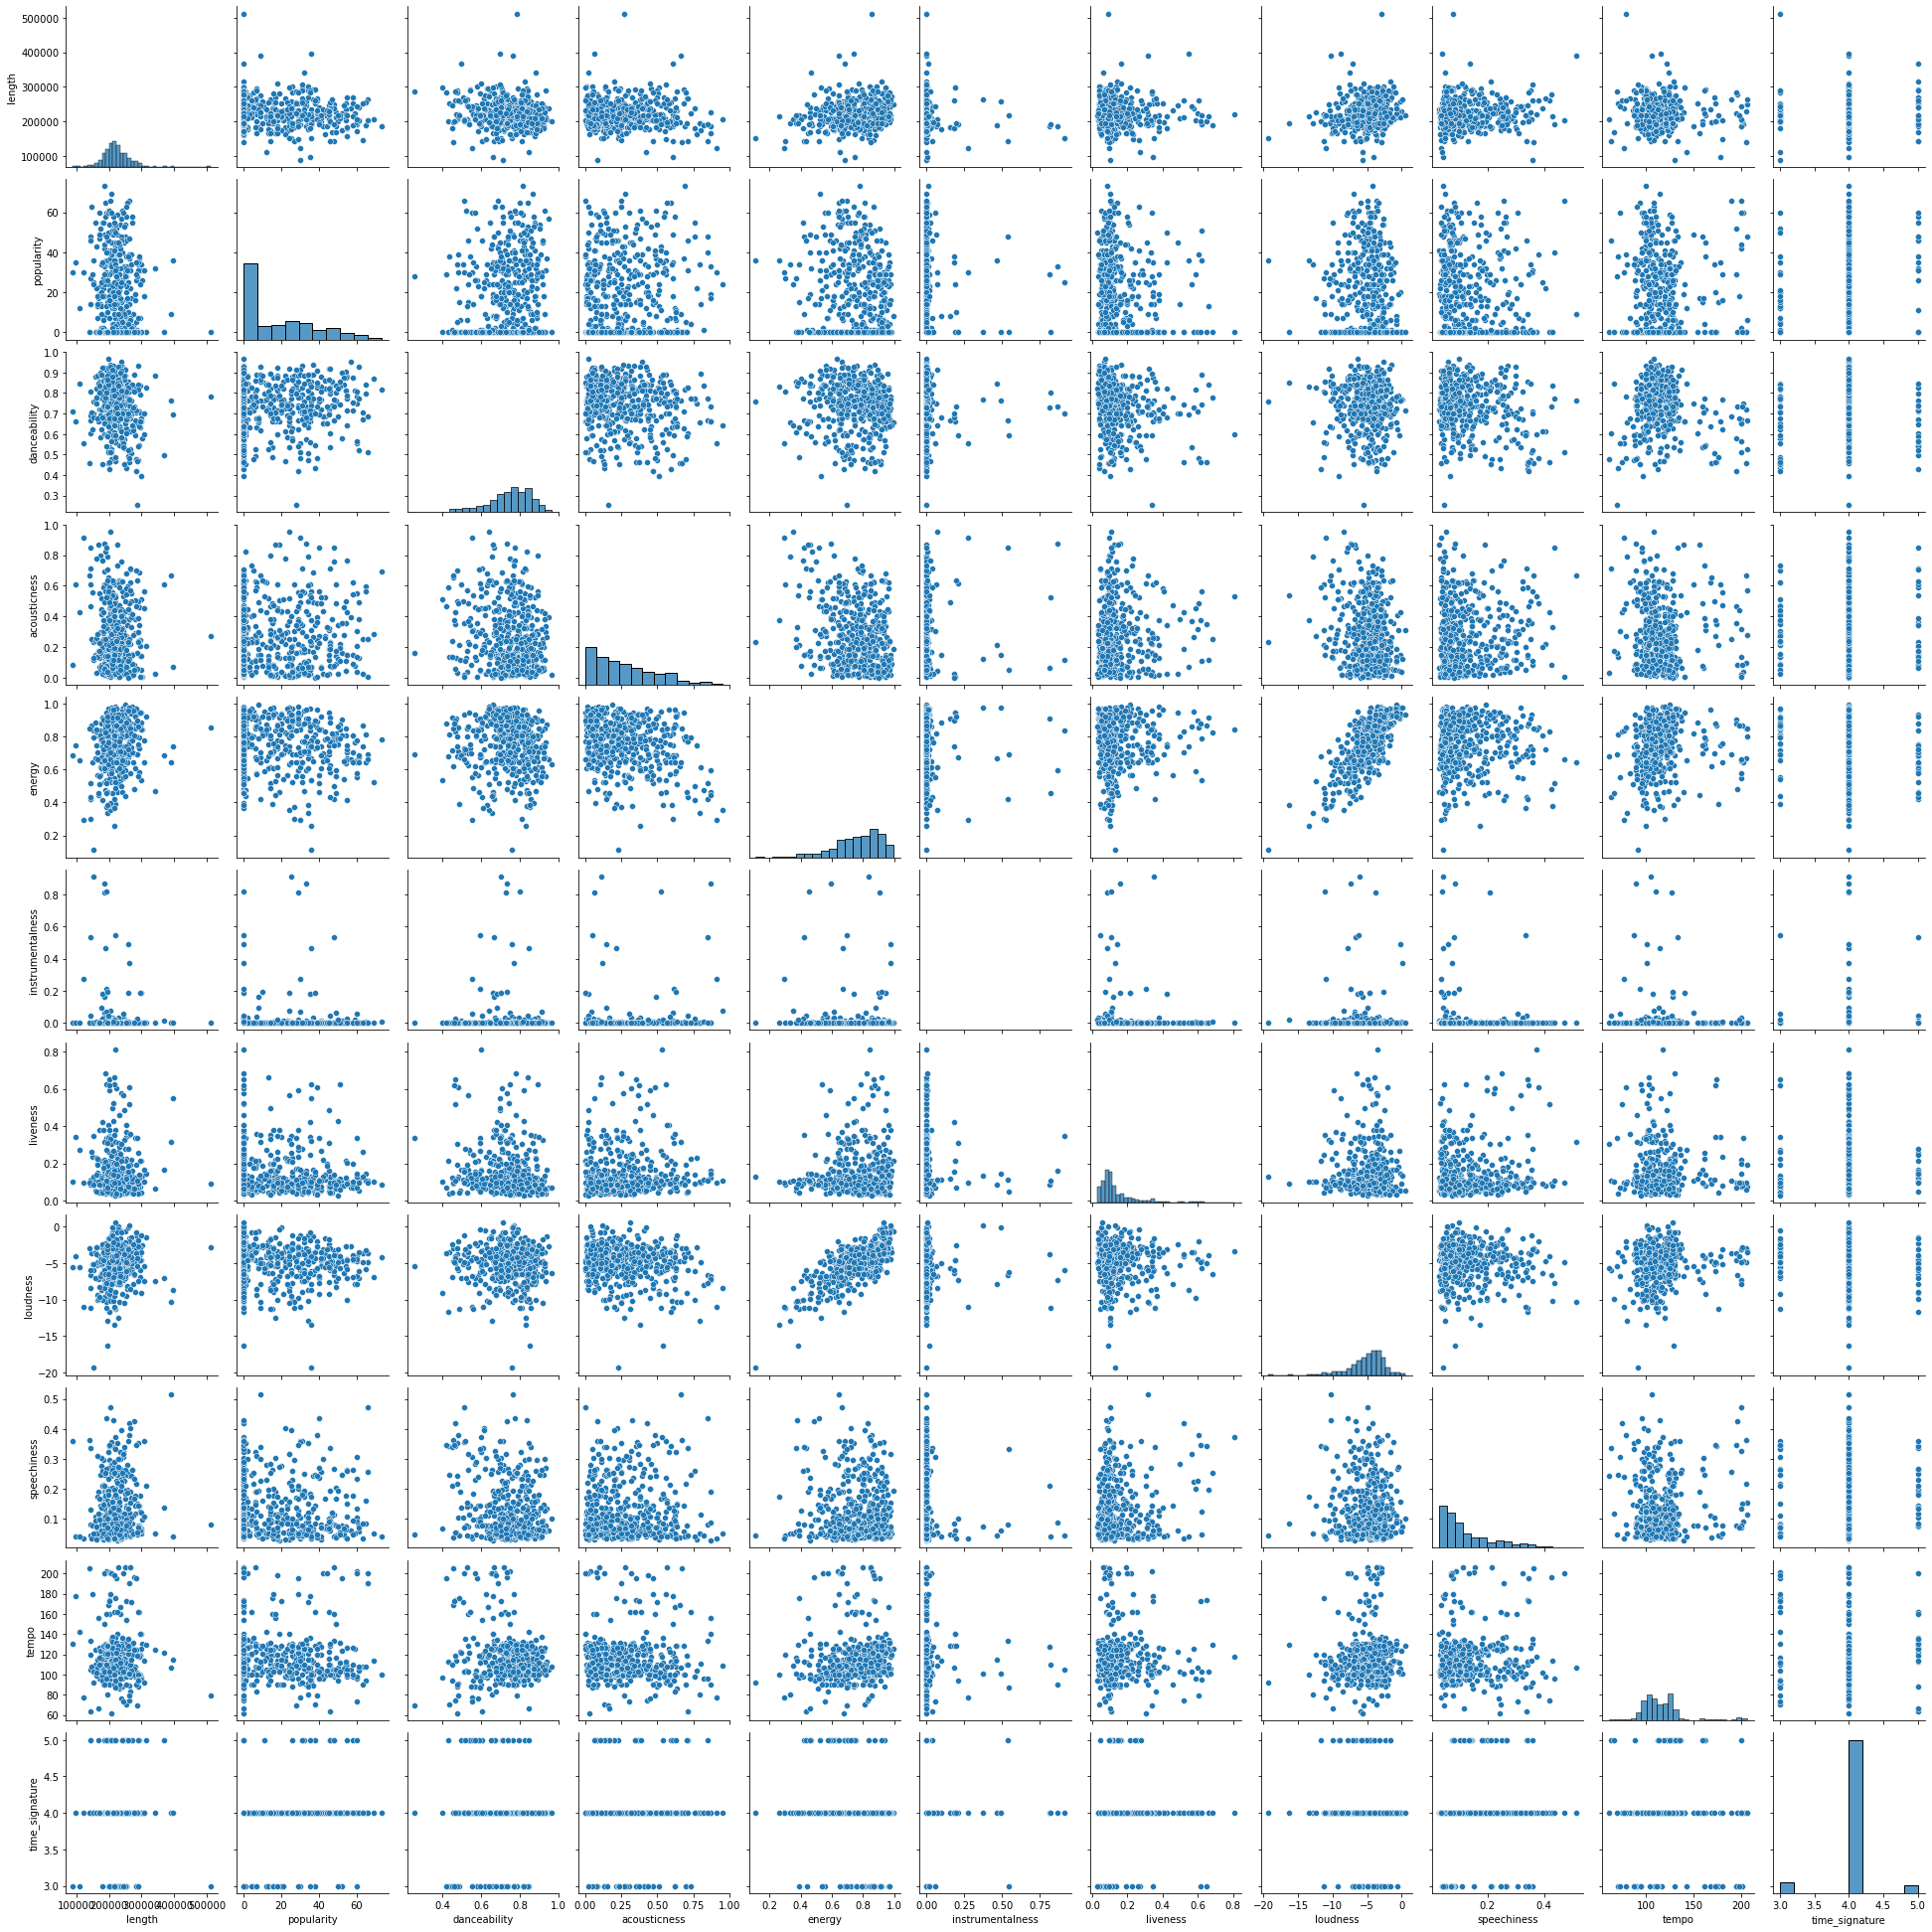

In [7]:
sns.pairplot(nigerian_music_df_2) 

Energy and loudness have a strong relationship

PCA

In [8]:
n_components = 2

pca = PCA(n_components=n_components)
nigerian_music_df_2_pca = pca.fit(nigerian_music_df_2.iloc[:,:])

In [9]:
nigerian_music_df_2_pca.components_

array([[ 9.99999999e-01, -3.77517072e-05, -3.94889302e-07,
        -2.81173925e-07,  7.71245144e-07, -2.80475060e-07,
        -2.91127618e-08,  9.62398315e-06,  1.69611463e-07,
         1.81543891e-06,  3.09659905e-08],
       [-2.16761045e-06, -5.93598399e-03, -6.11832211e-04,
        -6.58483362e-04,  9.97292178e-04, -2.09650717e-04,
        -6.38162504e-05,  1.31953472e-02,  2.25437210e-04,
         9.99894224e-01, -5.34929818e-04]])

All of the components have been assigned a weight. Component 1 has a strong correlation with length and component 2 has a strong correlation with loudness and tempo. Component 1 can be viewwed as a measure of length and component 2 as a measure of loudness and tempo. 

extracting prohected components of the model

In [10]:
nigerian_music_df_2_pca_vals = pca.fit_transform(nigerian_music_df_2.iloc[:,:])

In [11]:
type(nigerian_music_df_2_pca_vals)

numpy.ndarray

In [12]:
nigerian_music_df_2_pca_vals
nigerian_music_df_2_pca_vals.shape

(477, 2)

Adding the PCA components to the data set 

In [13]:
nigerian_music_df_2['c1'] = [item[0] for item in nigerian_music_df_2_pca_vals]
nigerian_music_df_2['c2'] = [item[1] for item in nigerian_music_df_2_pca_vals]

In [14]:
nigerian_music_df_2

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,c1,c2
0,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,-78253.481132,16.453613
1,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3,-132765.480405,13.672902
2,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4,-14495.480887,13.348628
3,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4,-47118.479895,-5.314059
4,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4,-70204.480313,-11.314406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4,-28293.479704,11.565944
526,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4,30454.520642,37.504082
527,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4,905.520626,4.649045
528,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4,56026.520564,7.433943


Plotting the PCA Values against each other

<AxesSubplot:xlabel='c1', ylabel='c2'>

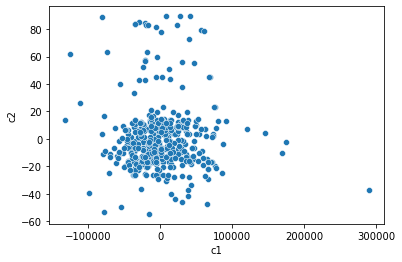

In [15]:
sns.scatterplot(data = nigerian_music_df_2, x = 'c1', y = 'c2')

Introduce clusters- first I use the kmeans to determine what the best number of clusters is 

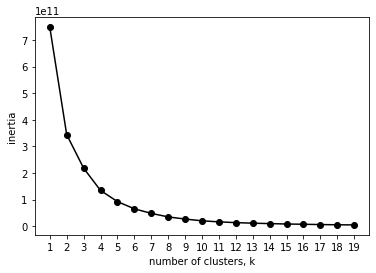

In [16]:
ks = range(1, 20)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(nigerian_music_df_2.iloc[:,-2:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

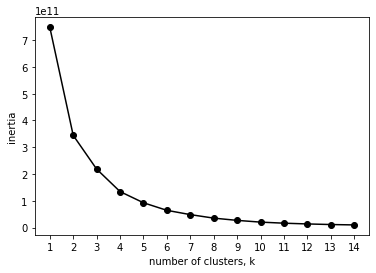

In [17]:
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(nigerian_music_df_2.iloc[:,-2:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

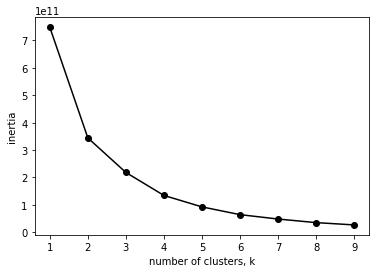

In [18]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(nigerian_music_df_2.iloc[:,-2:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

I think 5 clusters will represents the data best 

In [19]:
k_means_pca = KMeans(n_clusters = 5, init = 'random')
music_pca_kmeans = k_means_pca.fit(nigerian_music_df_2.iloc[:,:])

In [20]:
nigerian_music_df_2['PCA 5 clusters'] = pd.Series(k_means_pca.predict(nigerian_music_df_2.iloc[:,:].values), index = nigerian_music_df_2.index)
nigerian_music_df_2

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,c1,c2,PCA 5 clusters
0,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,-78253.481132,16.453613,1
1,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3,-132765.480405,13.672902,1
2,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4,-14495.480887,13.348628,0
3,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4,-47118.479895,-5.314059,1
4,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4,-70204.480313,-11.314406,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4,-28293.479704,11.565944,0
526,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4,30454.520642,37.504082,4
527,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4,905.520626,4.649045,4
528,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4,56026.520564,7.433943,3


<AxesSubplot:xlabel='c1', ylabel='c2'>

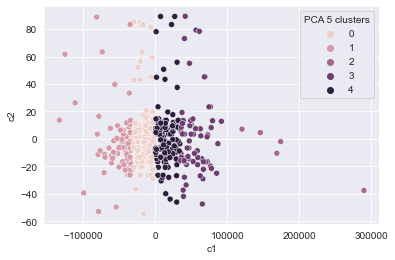

In [21]:
sns.set_style("darkgrid")
sns.scatterplot(data = nigerian_music_df_2, x = 'c1', y = 'c2', hue = 'PCA 5 clusters')

Showing our PCA components can be split into 5 different groups, which is shown on the graph- explain this better in the essay

Clustering based on popularity 

# Regression Analysis- how to acheive popularity in African Music

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [23]:
music_df = pd.read_csv('nigerian_spotify_songs1.csv')
music_df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [24]:
music_df_1 = music_df[music_df.artist_top_genre != 'na']
music_df_1

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [25]:
music_df_2 = music_df_1.drop('name', 1)
music_df_2 = music_df_2.drop('album', 1)
music_df_2 = music_df_2.drop('artist', 1)
music_df_2 = music_df_2.drop('artist_top_genre', 1)
music_df_2 = music_df_2.drop('release_date', 1)
music_df_2 

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...
525,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


Text(0, 0.5, 'popularity')

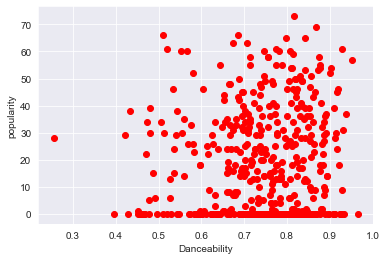

In [26]:
x = music_df_2.danceability
y = music_df_2.popularity

plt.scatter(x, y, color = 'red')
plt.xlabel('Danceability')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

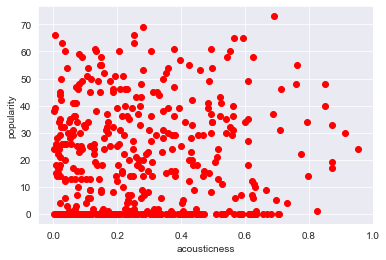

In [27]:
x = music_df_2.acousticness
y = music_df_2.popularity

plt.scatter(x, y, color = 'red')
plt.xlabel('acousticness')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

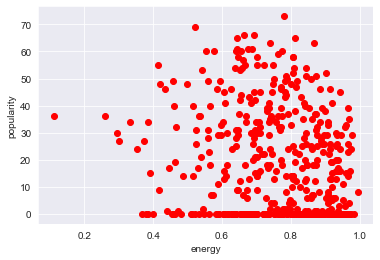

In [28]:
x = music_df_2.energy
y = music_df_2.popularity

plt.scatter(x, y, color = 'red')
plt.xlabel('energy')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

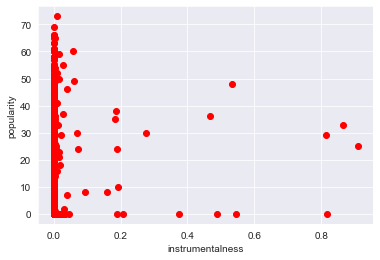

In [29]:
x = music_df_2.instrumentalness
y = music_df_2.popularity

plt.scatter(x, y, color = 'red')
plt.xlabel('instrumentalness')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

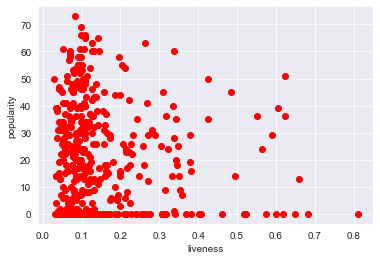

In [30]:
x = music_df_2.liveness
y = music_df_2.popularity

plt.scatter(x, y, color = 'red')
plt.xlabel('liveness')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

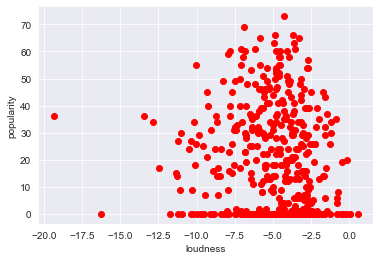

In [31]:
x = music_df_2.loudness
y = music_df_2.popularity

plt.scatter(x, y, color = 'red')
plt.xlabel('loudness')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

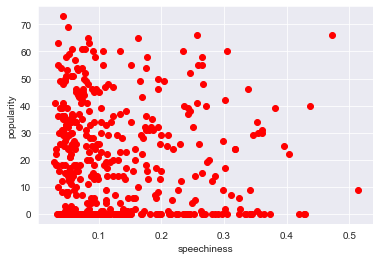

In [32]:
x = music_df_2.speechiness
y = music_df_2.popularity

plt.scatter(x, y, color = 'red')
plt.xlabel('speechiness')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

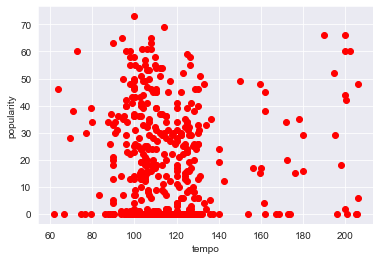

In [33]:
x = music_df_2.tempo
y = music_df_2.popularity

plt.scatter(x, y, color = 'red')
plt.xlabel('tempo')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

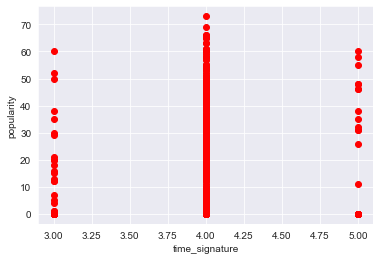

In [34]:
x = music_df_2.time_signature
y = music_df_2.popularity

plt.scatter(x, y, color = 'red')
plt.xlabel('time_signature')
plt.ylabel('popularity')

In [35]:
X1 = music_df_2[['length','danceability', 'acousticness','energy', 'instrumentalness', 'liveness' 
                ,'loudness', 'speechiness', 'tempo','time_signature']]
y1 = music_df_2[['popularity']]

In [36]:
from sklearn import linear_model

Defining the linear regression model - https://www.w3schools.com/python/python_ml_multiple_regression.asp

In [37]:
regr = linear_model.LinearRegression ()

In [38]:
model_1= regr.fit(X, y)

NameError: name 'X' is not defined

In [ ]:
print(regr.coef_)

The above results represent the coefficents of our x varaibles 
So if we increase length of a song by 1, the popularity will decrease 
Might want to go through this more to possibly scale

In [ ]:
print (model.intercept_, model.coef_)

#maybe look at the correlation nect or create pther models with diff variables

Popularity with the varaibles that have some impact ie danceability, acouticness, energy, liveness, speechiness, tempo and cluster by music genres then cluster by gender 

# Gender and proportion of songs 

In [45]:
music_df = pd.read_csv('nigerian_spotify_songs1.csv')
gender_df= pd.read_csv('nigerian_artist_gender.csv')
music_df


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [46]:
gender_music_df = music_df.merge(gender_df , on= 'artist')
gender_music_df

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Gender,Source
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
1,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
2,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
3,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
4,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601,Poco A Poco,The Evolution,Triplemg,na,2014,202240,0,0.759,0.247,0.691,0.000012,0.0339,-9.682,0.0857,125.987,4,Mixed Group,https://music.apple.com/gb/artist/triplemg/859...
4602,Jeje,Jeje,DJ Xclusive,gqom,2014,236329,25,0.811,0.398,0.930,0.000000,0.3040,-3.012,0.2090,127.989,4,Male,https://en.wikipedia.org/wiki/DJ_Xclusive
4603,Osey,Osey,Nero X,christian afrobeat,2015,223946,28,0.795,0.343,0.642,0.000000,0.0356,-4.792,0.0853,108.988,4,Male,https://www.google.com/search?q=nero+x&oq=nero...
4604,Slow Down,Refuse To Be Broke,R2Bees,afro dancehall,2014,259373,0,0.519,0.109,0.721,0.000000,0.2750,-3.148,0.3580,135.733,5,Male Group,https://www.google.com/search?q=R2Bees&sxsrf=A...


removing na values

In [59]:
gender_music_df = gender_music_df.dropna()
gender_music_df = gender_music_df[gender_music_df.artist_top_genre != 'na']
gender_music_df

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Gender,Source
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851000,0.420,0.5340,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
1,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851000,0.420,0.5340,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
2,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851000,0.420,0.5340,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
3,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851000,0.420,0.5340,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
4,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851000,0.420,0.5340,0.1100,-6.699,0.0829,133.015,5,Male,https://open.spotify.com/artist/15GgEOJiFyjQm4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,Vasa Shiii,Vasa Shiii,Tee Blaq,azontobeats,2014,198347,0,0.840,0.024300,0.765,0.0455,0.0838,-6.507,0.0494,126.999,4,Male,https://www.google.com/search?q=tee+blaq&sxsrf...
4598,"Adaobi (feat. Don Jazzy, Di'ja, Reekado Banks ...","Adaobi (feat. Don Jazzy, Di'ja, Reekado Banks ...",Mavins,afro dancehall,2014,260063,38,0.701,0.000665,0.898,0.1850,0.1560,-5.932,0.0837,128.045,4,Mixed Group,https://en.wikipedia.org/wiki/Mavin_Records
4602,Jeje,Jeje,DJ Xclusive,gqom,2014,236329,25,0.811,0.398000,0.930,0.0000,0.3040,-3.012,0.2090,127.989,4,Male,https://en.wikipedia.org/wiki/DJ_Xclusive
4603,Osey,Osey,Nero X,christian afrobeat,2015,223946,28,0.795,0.343000,0.642,0.0000,0.0356,-4.792,0.0853,108.988,4,Male,https://www.google.com/search?q=nero+x&oq=nero...


Looking at the porportion of men and women 